In [1]:
import re
import os
import glob
import linecache
from pprint import pprint
import pandas as pd
import matplotlib as mt
from matplotlib import pyplot as plt
from matplotlib import pylab
import openbabel as obabel
import pybel as babel

In [4]:
%matplotlib inline
%matplotlib notebook
# Matplotlib options
%matplotlib inline
mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8

In [2]:
os.chdir('C:/Users/P285237/Desktop/Docking/')
files=[]
names =[]
scores=[]
mass=[]
formula=[]
smiles=[]
model=[]
het_atoms=[] 
rescoring=[]
for file in glob.glob("*.mol2"):
    with open(file,'rt') as f:
        for i, line in enumerate(f):
            if 'Gold.Score' in line:
                scores.append (float(linecache.getline(file,i+3).strip().split(' ')[0]))
                files.append (file.split('.')[0])
                
    #for mol in babel.readfile("mol2",file):
        #names.append (mol.title)
        #mass.append (mol.molwt)
        #formula.append (mol.formula)
        #smiles.append (mol)
        
d={ 'file':pd.Series(files),
    'score':pd.Series(scores),
    'compound name':pd.Series(names),
    'molecular formula': pd.Series (formula),
    'molecular weight': pd.Series (mass),
    'smiles': pd.Series (smiles),}
table=pd.DataFrame (d)
sort =table.sort_values ('score',ascending=False)
sort = sort.reset_index(drop=True)

In [3]:
sort

,file,score,compound name,molecular formula,molecular weight,smiles
0,1D4F_ADN_1723,80.66,NaN,NaN,NaN,NaN
1,1D4F_ADN_1723,80.52,NaN,NaN,NaN,NaN
2,1D4F_ADN_1723,80.48,NaN,NaN,NaN,NaN
3,1D4F_ADN_1723,80.36,NaN,NaN,NaN,NaN
4,1D4F_ADN_1723,79.87,NaN,NaN,NaN,NaN
5,1D4F_ADN_1723,79.75,NaN,NaN,NaN,NaN
6,1D4F_ADN_1723,79.71,NaN,NaN,NaN,NaN
7,1G60_SAM_466,79.56,NaN,NaN,NaN,NaN
8,1G60_SAM_466,79.43,NaN,NaN,NaN,NaN
9,1D4F_ADN_1723,78.61,NaN,NaN,NaN,NaN


Text(0,0.5,'score')

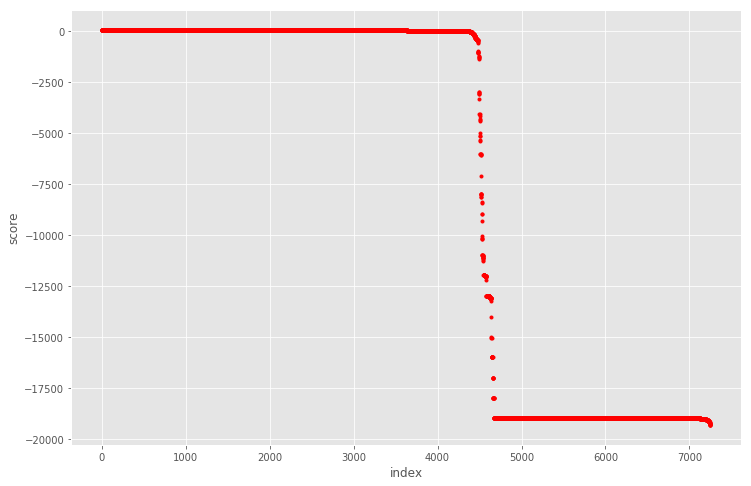

In [5]:
plt.plot ((list(sort.index)),list(sort['score']), 'ro',marker='.')
plt.xlabel('index')
plt.ylabel ('score')